In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_name = '1063'
time_split = '1m'
csv_file_path = '/home/cc/clio/runs/raw/tencent/characteristic/1063/1m/characteristic.csv'
df_data = pd.read_csv(csv_file_path)
df_data

,num_io,start_time,end_time,ts_unit,duration,read_count,write_count,read_ratio,write_ratio,read_write_ratio,...,write_iat_p60,write_iat_p70,write_iat_p75,write_iat_p80,write_iat_p90,write_iat_p95,write_iat_p99,write_iat_p999,write_iat_p9999,write_iat_p100
0,44447,2.016100e+00,5.999894e+04,ms,59996.9210,34562,9885,0.7776,0.2224,3.4964,...,3.729411,4.979147e+00,5.848400e+00,6.968832e+00,1.098852e+01,1.596411e+01,5.030692e+01,7.842878e+02,1.282984e+03,1.282984e+03
1,39680,6.000000e+04,1.200000e+05,ms,59999.9955,30502,9178,0.7687,0.2313,3.3234,...,2.945059,3.725814e+00,4.258084e+00,4.950336e+00,7.663061e+00,1.241583e+01,8.160057e+01,1.343748e+03,2.195862e+03,2.195862e+03
2,54722,1.200000e+05,1.799998e+05,ms,59999.7992,41966,12756,0.7669,0.2331,3.2899,...,2.796691,3.563230e+00,4.093643e+00,4.786423e+00,7.564615e+00,1.211197e+01,4.439708e+01,6.563327e+02,1.569220e+03,1.569220e+03
3,60007,1.800000e+05,2.399997e+05,ms,59999.7043,42857,17150,0.7142,0.2858,2.4990,...,2.620251,3.331978e+00,3.795400e+00,4.382209e+00,6.372092e+00,8.842269e+00,1.951834e+01,2.683413e+02,1.615427e+03,1.615427e+03
4,61624,2.400000e+05,2.999997e+05,ms,59999.6803,45108,16516,0.7320,0.2680,2.7312,...,3.073399,3.934619e+00,4.516861e+00,5.253314e+00,7.810037e+00,1.087408e+01,2.038680e+01,1.308700e+02,7.615399e+02,7.615399e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,12520,7.809600e+08,7.810190e+08,ms,59000.0000,10473,2047,0.8365,0.1635,5.1163,...,3.703440,5.924520e+00,7.978352e+00,1.178055e+01,4.228474e+01,1.423808e+02,1.083190e+03,2.051264e+03,2.082979e+03,2.082979e+03
12890,1008,7.810200e+08,7.810790e+08,ms,59003.7286,874,134,0.8671,0.1329,6.5224,...,280.163417,5.553309e+02,7.391129e+02,9.988252e+02,1.349384e+03,1.828370e+03,1.999763e+03,1.999771e+03,1.999771e+03,1.999776e+03
12891,2777,7.810800e+08,7.811394e+08,ms,59350.9745,2417,360,0.8704,0.1296,6.7139,...,38.923921,8.517947e+01,1.325346e+02,2.182924e+02,6.989813e+02,1.277835e+03,2.050381e+03,2.064848e+03,2.064848e+03,2.064848e+03
12892,35835,7.811400e+08,7.811998e+08,ms,59787.1000,26245,9590,0.7324,0.2676,2.7367,...,3.003849,3.766748e+00,4.260622e+00,4.888941e+00,7.348472e+00,1.204780e+01,8.057535e+01,1.183762e+03,1.835652e+03,1.835652e+03


# 1. Visualization of Data

In [4]:
import matplotlib.pyplot as plt

# Define categories and slice each category for visualization
categories = ['iops', 'read_write_ratio', 'write_size_ratio']
start_index = 1000
end_index = 2000

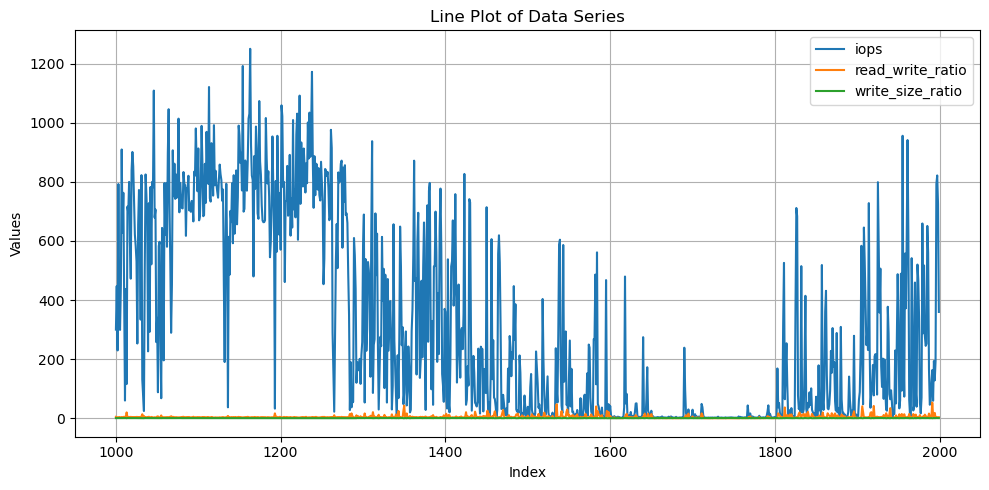

In [5]:
# Iterate through each category and plot
plt.figure(figsize=(10, 5))

for category in categories:
    data = df_data[category].iloc[start_index:end_index]  # Slice data for the current category
    plt.plot(data.index, data.values, label=category)

plt.title('Line Plot of Data Series')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

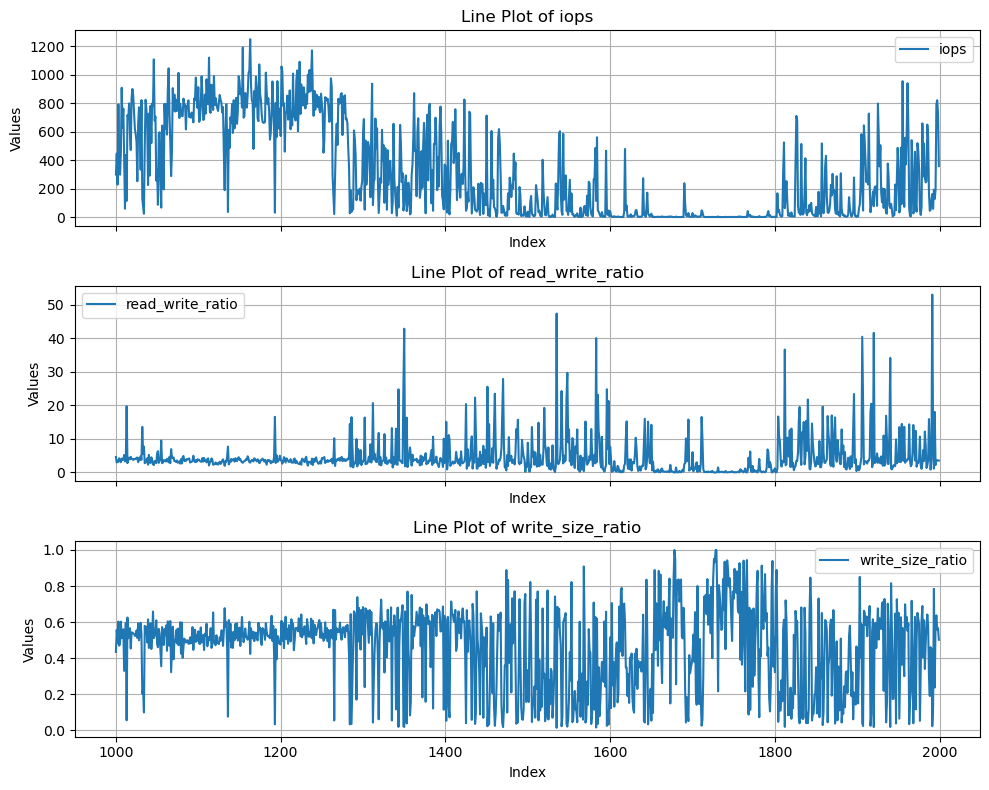

In [6]:
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 8), sharex=True)

# Iterate through each category and plot in separate subplot
for idx, category in enumerate(categories):
    data = df_data[category].iloc[start_index:end_index]  # Slice data for the current category
    axs[idx].plot(data.index, data.values, label=category)
    axs[idx].set_title(f'Line Plot of {category}')
    axs[idx].set_xlabel('Index')
    axs[idx].set_ylabel('Values')
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

# 2. Univariate Feature Drift Detection

## 2.1 Drift Detection

In [8]:
from alibi_detect.cd import MMDDrift

# select feature category, window length and step size
category = 'iops'
window_len = 120
step_size = 60

2024-07-14 20:27:55.468511: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
ref_start = 0
ref_end = window_len
start = window_len
end = start + window_len
preds = []

while end < len(df_data):
    data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()
    cd = MMDDrift(data_ref, backend='tensorflow', p_val=0.005)

    x = df_data[category].iloc[start:end].to_numpy()
    pred = cd.predict(x, return_p_val=True, return_distance=True)
    preds.append(pred)
    
    ref_start += step_size
    ref_end = ref_start + window_len
    start += step_size
    end = start + window_len

2024-07-14 20:28:02.939194: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
# Initialize lists to store data for plotting
window_indices = []
is_drift_values = []
p_val_values = []
distance_values = []
threshold_values = []

# Extract data for each prediction in preds
for idx, pred in enumerate(preds):
    window_indices.append(idx + 1)  # Assuming window index starts from 1
    is_drift_values.append(pred['data']['is_drift'])
    p_val_values.append(pred['data']['p_val'])
    distance_values.append(pred['data']['distance'])
    threshold_values.append(pred['data']['threshold'])

# Create a DataFrame from the lists
data_dict = {
    'Window_Index': window_indices,
    'Is_Drift': is_drift_values,
    'P_Value': p_val_values,
    'Distance': distance_values,
    'Threshold': threshold_values
}

df_preds = pd.DataFrame(data_dict)
df_preds

,Window_Index,Is_Drift,P_Value,Distance,Threshold
0,1,1,0.00,0.060147,0.005
1,2,0,0.10,0.008720,0.005
2,3,1,0.00,0.026613,0.005
3,4,0,0.37,-0.000113,0.005
4,5,0,0.02,0.015878,0.005
...,...,...,...,...,...
206,207,1,0.00,0.119952,0.005
207,208,0,0.87,-0.007886,0.005
208,209,1,0.00,0.222989,0.005
209,210,0,0.01,0.057832,0.005


In [11]:
num_drifts = df_preds['Is_Drift'].sum()
print(f'Number of drifts detected: {num_drifts}')

Number of drifts detected: 129


In [12]:
# Get drift_window_indices and no_drift_window_indices from DataFrame
drift_window_indices = df_preds[df_preds['Is_Drift'] == 1]['Window_Index'].tolist()
no_drift_window_indices = df_preds[df_preds['Is_Drift'] == 0]['Window_Index'].tolist()

## 2.2 Visualization of Prediction

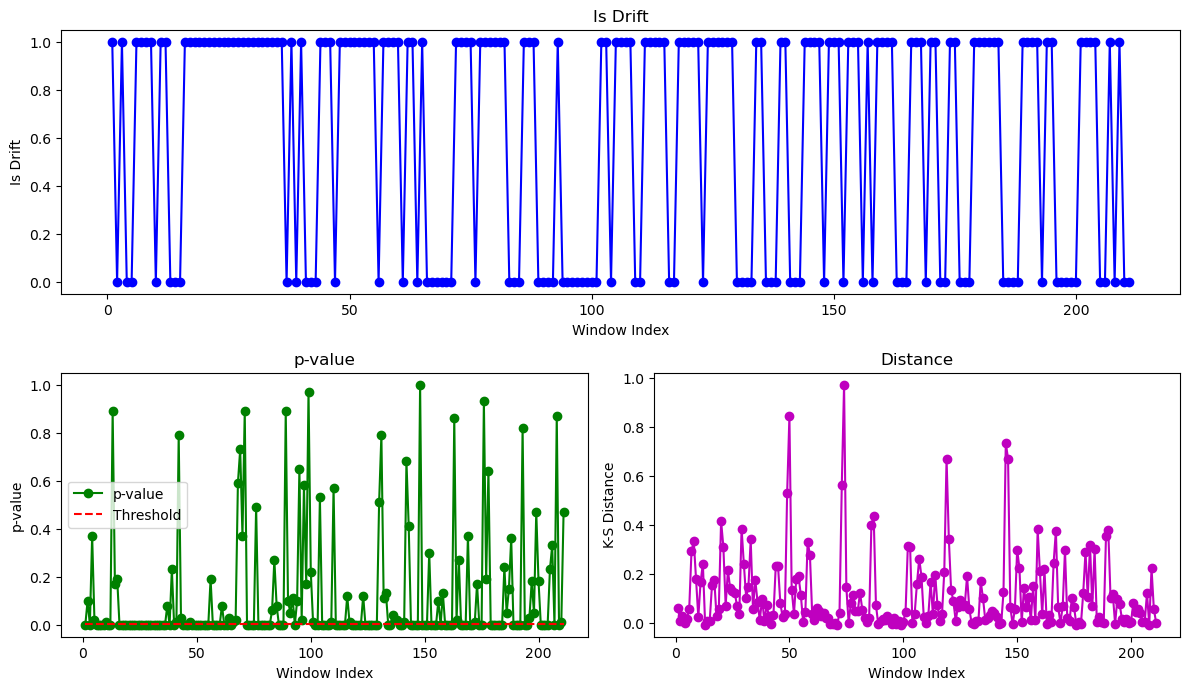

In [13]:
# Visualization example
plt.figure(figsize=(12, 10))

# Plot is_drift
plt.subplot(3, 1, 1)
plt.plot(window_indices, is_drift_values, marker='o', linestyle='-', color='b')
plt.title('Is Drift')
plt.xlabel('Window Index')
plt.ylabel('Is Drift')

# Plot p_val
plt.subplot(3, 2, 3)
plt.plot(window_indices, p_val_values, marker='o', linestyle='-', color='g', label='p-value')
plt.plot(window_indices, threshold_values, linestyle='--', color='r', label='Threshold')
plt.title('p-value')
plt.xlabel('Window Index')
plt.ylabel('p-value')
plt.legend()

# Plot distance
plt.subplot(3, 2, 4)
plt.plot(window_indices, distance_values, marker='o', linestyle='-', color='m')
plt.title('Distance')
plt.xlabel('Window Index')
plt.ylabel('K-S Distance')

plt.tight_layout()
plt.show()

In [14]:
drift_index = 12

if drift_index in drift_window_indices:
    print(f'Window {drift_index} is a drift window')

Window 12 is a drift window


Distance: 0.24119000136852264
P-value: 0.0


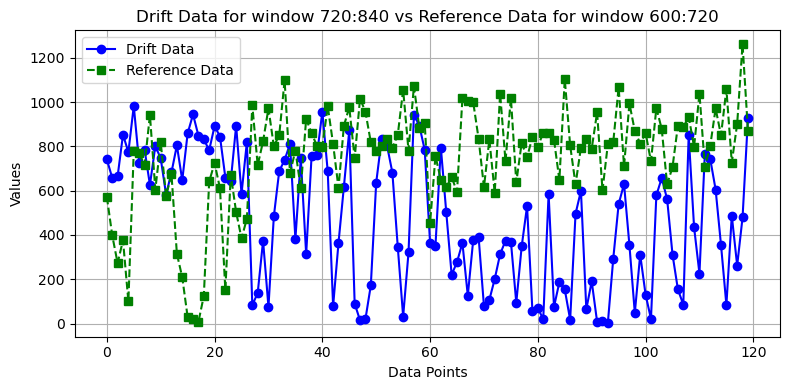

In [15]:
indices = np.arange(window_len)  # Assuming x-axis is indexed by data points

start = drift_index * step_size
end = start + window_len
ref_start = start - window_len
ref_end = start
drift_data = df_data[category].iloc[start:end].to_numpy()
data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()

# Calculate rounded values for distance and keyvalue
rounded_distance = round(distance_values[drift_index - 1], 5)
rounded_keyvalue = p_val_values[drift_index - 1]

print(f'Distance: {rounded_distance}')
print(f'P-value: {rounded_keyvalue}')

# Plotting both drift data and reference data
plt.figure(figsize=(8, 4))
plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label='Drift Data')
plt.plot(indices, data_ref, marker='s', linestyle='--', color='g', label='Reference Data')
plt.title(f'Drift Data for window {start}:{end} vs Reference Data for window {ref_start}:{ref_end}')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.3 Visualization of Prediction by Ranking

In [16]:
# Rank the p-values from lowest to highest
df_sorted_pval = df_preds.sort_values(by='P_Value')

# Select the top five p-values and their corresponding window indices
top_five_drifts = df_sorted_pval.head(5)

top_five_drifts

,Window_Index,Is_Drift,P_Value,Distance,Threshold
126,127,1,0.0,0.072749,0.005
114,115,1,0.0,0.073352,0.005
117,118,1,0.0,0.208327,0.005
118,119,1,0.0,0.669390,0.005
119,120,1,0.0,0.342432,0.005


In [17]:
# Select the bottom five p-values and their corresponding window indices
top_five_non_drifts = df_sorted_pval.tail(5)

top_five_non_drifts

,Window_Index,Is_Drift,P_Value,Distance,Threshold
70,71,0,0.89,-0.007412,0.005
88,89,0,0.89,-0.006868,0.005
175,176,0,0.93,-0.008121,0.005
98,99,0,0.97,-0.007744,0.005
147,148,0,1.00,-0.005840,0.005


In [18]:
# Function to visualize drift data for given window indices
def visualize(window_indices, step_size, window_len, df_data, category='iops', visualize_type='Drift'):
    for window_index in window_indices:
        start = window_index * step_size
        end = start + window_len
        ref_start = start - window_len
        ref_end = start
        drift_data = df_data[category].iloc[start:end].to_numpy()
        data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()
        
        plt.figure(figsize=(8, 4))
        indices = np.arange(len(drift_data))  # Assuming x-axis is indexed by data points
        plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label=f'{visualize_type} Data Window {window_index}')
        plt.plot(indices, data_ref, marker='s', linestyle='--', color='g', label='Reference Data')
        plt.title(f'Drift Data for Window Index {window_index} ({start}:{end})')
        plt.xlabel('Data Points')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

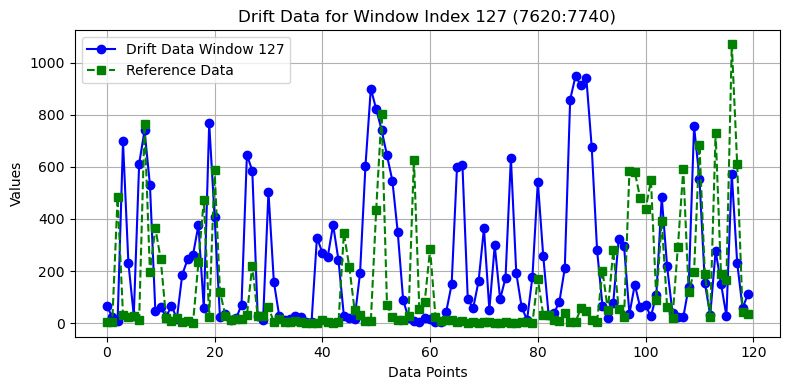

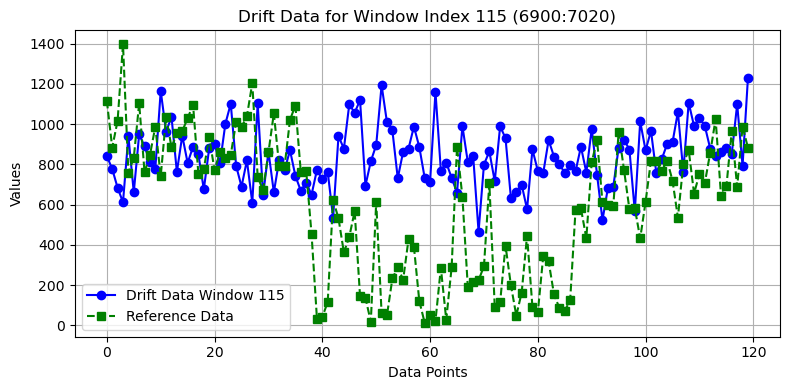

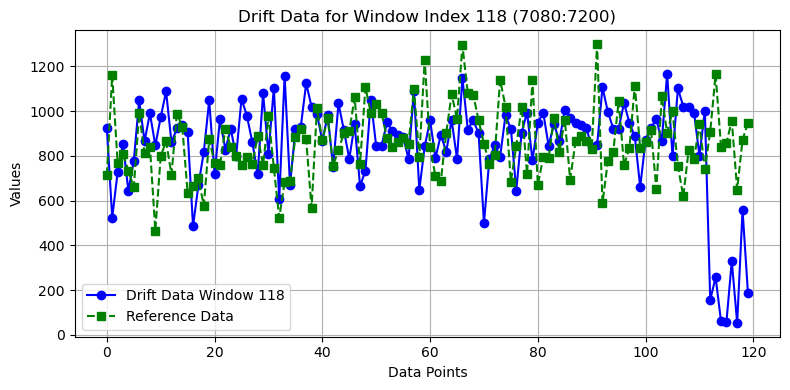

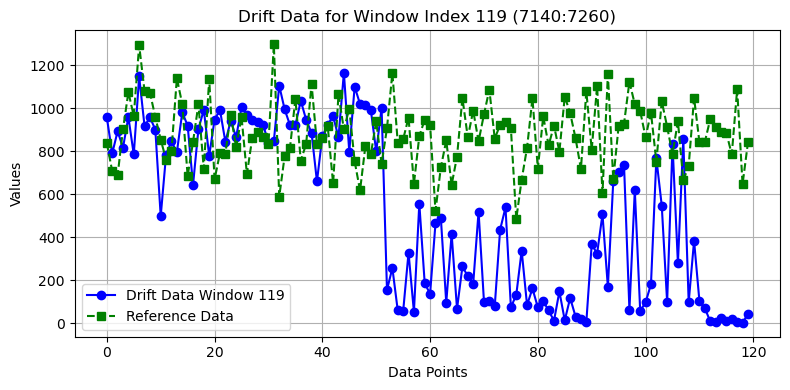

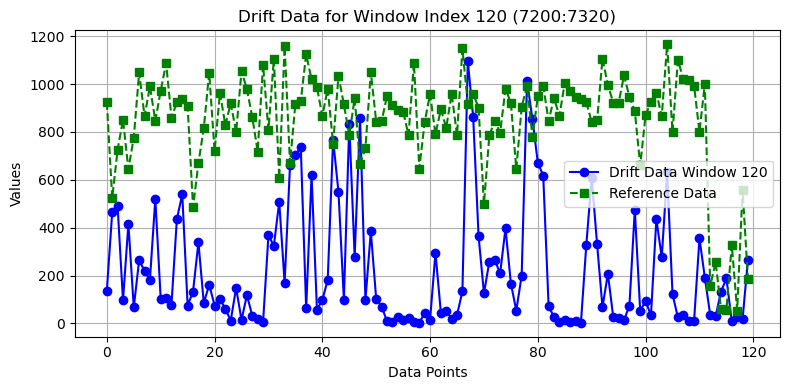

In [19]:
visualize(top_five_drifts['Window_Index'].tolist(), step_size, window_len, df_data, visualize_type='Drift')

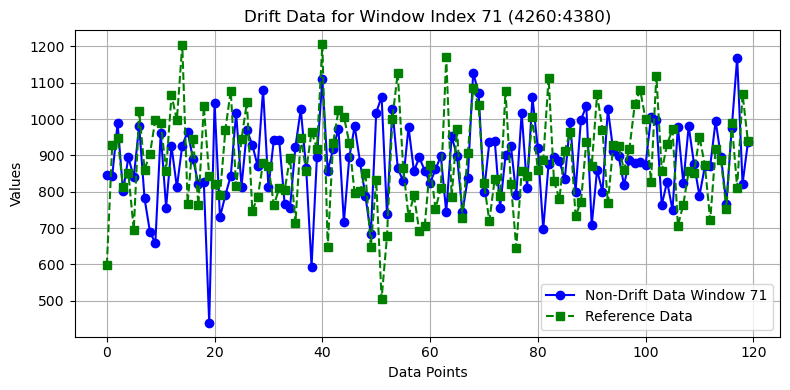

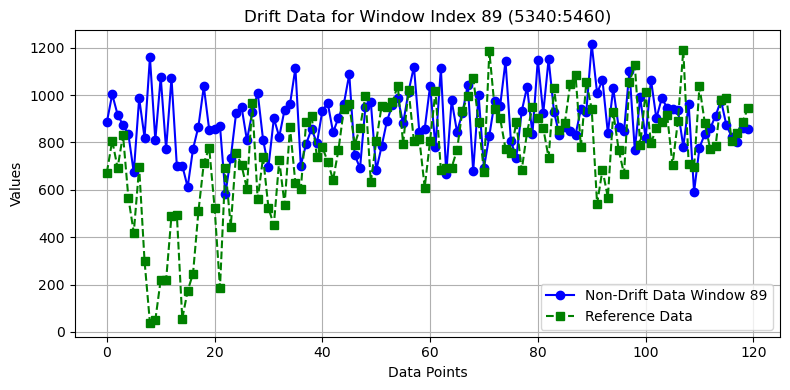

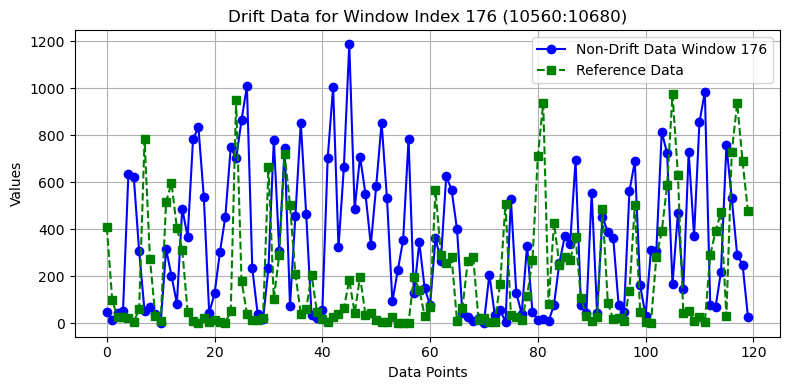

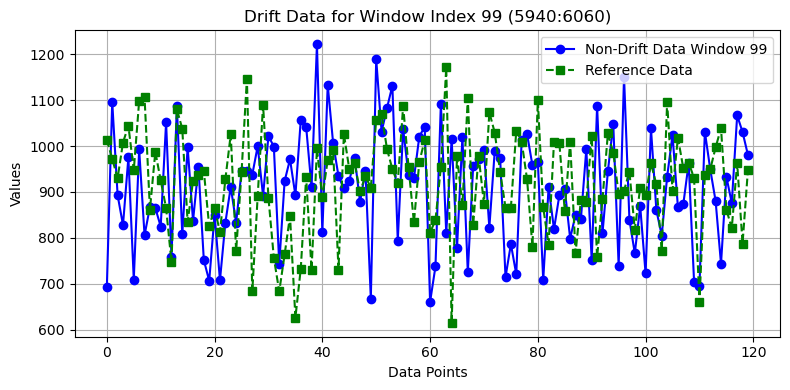

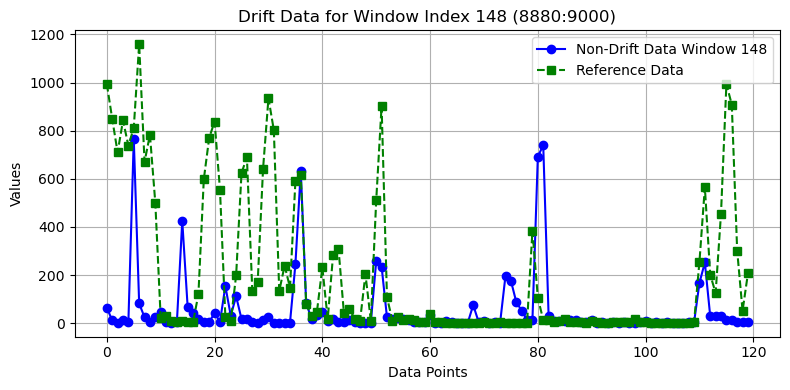

In [20]:
visualize(top_five_non_drifts['Window_Index'].tolist(), step_size, window_len, df_data, visualize_type='Non-Drift')

# 3. Multivariate Feature Drift Detection

## 3.1 Drift Detection

In [21]:
# select feature category, window length and step size
categories = ['iops', 'read_write_ratio', 'write_size_ratio']
window_len = 120
step_size = 60

In [22]:
start = window_len
end = start + window_len
ref_start = 0
ref_end = window_len
preds = []

while end < len(df_data):
    # select reference data
    data_ref = df_data[categories].iloc[ref_start:ref_end].to_numpy()
    cd = MMDDrift(data_ref, backend='tensorflow', p_val=0.005)

    x = df_data[categories].iloc[start:end].to_numpy()
    pred = cd.predict(x, return_p_val=True, return_distance=True)
    preds.append(pred)
    
    start += step_size
    end = start + window_len
    ref_start += step_size
    ref_end = ref_start + window_len

In [23]:
# Initialize lists to store data for plotting
window_indices = []
is_drift_values = []
p_val_values = []
distance_values = []
threshold_values = []

# Extract data for each prediction in preds
for idx, pred in enumerate(preds):
    window_indices.append(idx + 1)  # Assuming window index starts from 1
    is_drift_values.append(pred['data']['is_drift'])
    p_val_values.append(pred['data']['p_val'])
    distance_values.append(pred['data']['distance'])
    threshold_values.append(pred['data']['threshold'])

# Create a DataFrame from the lists
data_dict = {
    'Window_Index': window_indices,
    'Is_Drift': is_drift_values,
    'P_Value': p_val_values,
    'Distance': distance_values,
    'Threshold': threshold_values
}

df_preds = pd.DataFrame(data_dict)
df_preds

,Window_Index,Is_Drift,P_Value,Distance,Threshold
0,1,1,0.00,0.060241,0.005
1,2,0,0.07,0.008748,0.005
2,3,1,0.00,0.026593,0.005
3,4,0,0.30,0.000263,0.005
4,5,0,0.02,0.015454,0.005
...,...,...,...,...,...
206,207,1,0.00,0.119790,0.005
207,208,0,0.90,-0.007879,0.005
208,209,1,0.00,0.222730,0.005
209,210,1,0.00,0.057794,0.005


In [24]:
num_drifts = df_preds['Is_Drift'].sum()
print(f'Number of drifts detected: {num_drifts}')

Number of drifts detected: 132


In [25]:
# Get drift_window_indices and no_drift_window_indices from DataFrame
drift_window_indices = df_preds[df_preds['Is_Drift'] == 1]['Window_Index'].tolist()
no_drift_window_indices = df_preds[df_preds['Is_Drift'] == 0]['Window_Index'].tolist()

## 3.2 Visualization of Predictions

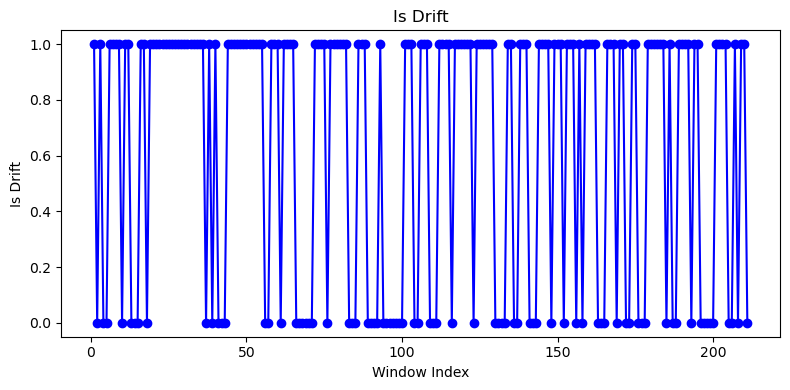

In [26]:
# Visualization example
plt.figure(figsize=(8, 4))

# Plot is_drift
plt.plot(window_indices, is_drift_values, marker='o', linestyle='-', color='b')
plt.title('Is Drift')
plt.xlabel('Window Index')
plt.ylabel('Is Drift')

plt.tight_layout()
plt.show()

In [27]:
drift_index = 12

if drift_index in drift_window_indices:
    print(f'Window {drift_index} is a drift window')

Window 12 is a drift window


In [28]:
data_ref.shape

(120, 3)

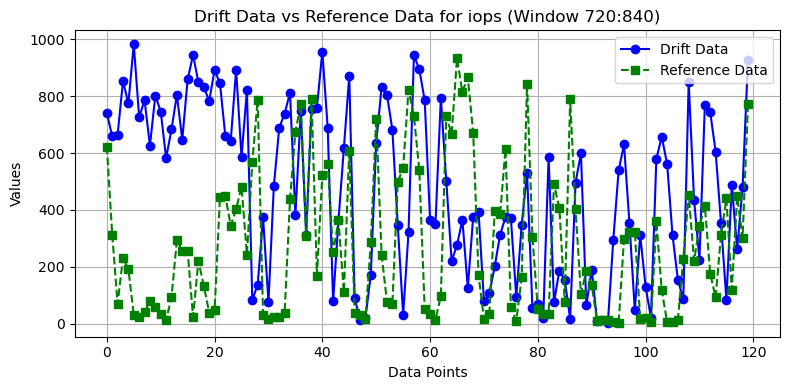

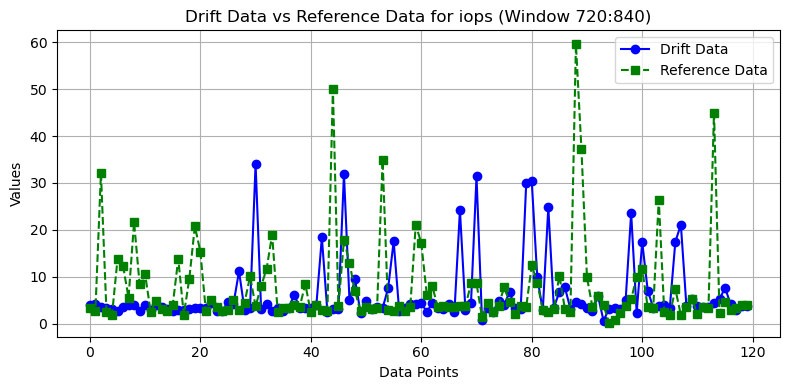

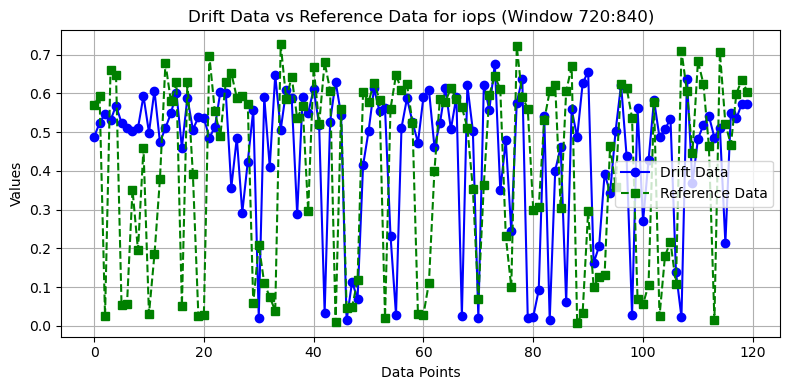

In [29]:
indices = np.arange(window_len)  

for idx, cate in enumerate(categories):
    start = drift_index * step_size
    end = start + window_len
    drift_data = df_data[cate].iloc[start:end].to_numpy()
    reference_data = data_ref[:,idx]

    # Plotting both drift data and reference data
    plt.figure(figsize=(8, 4))
    plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label='Drift Data')
    plt.plot(indices, reference_data, marker='s', linestyle='--', color='g', label='Reference Data')
    plt.title(f'Drift Data vs Reference Data for {category} (Window {start}:{end})')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 3.3 Check single feature

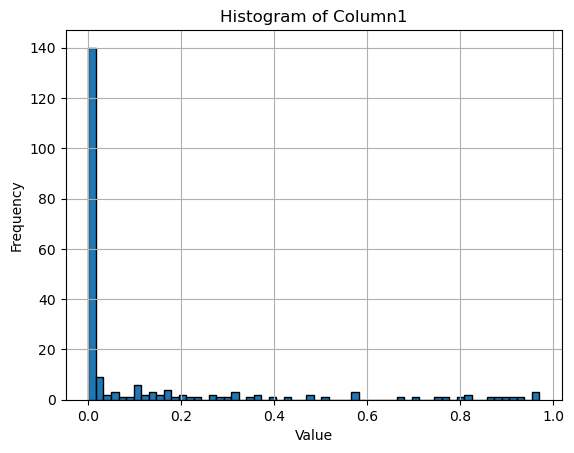

In [32]:
# Plotting a histogram for 'Column1'
df_preds['P_Value'].hist(bins=60, edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Column1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [33]:
high_p_value_indices = df_preds['P_Value'].sort_values().index[:30]

low_p_value_indices = df_preds['P_Value'].sort_values().index[-30:]

In [35]:
df_results = df_preds

df_results['pvals_drift'] = 0
df_results.loc[high_p_value_indices, 'pvals_drift'] = 1

df_results['pvals_nondrift'] = 0
df_results.loc[low_p_value_indices, 'pvals_nondrift'] = 1

In [36]:
index_arr = np.zeros((len(df_results), 2), dtype=int)

index_arr[:, 0] = np.arange(len(df_results)) * step_size
index_arr[:, 1] = index_arr[:, 0] + window_len * 2

index_arr[-1, -1] = min(len(df_data), index_arr[-1, -1])

index_df = pd.DataFrame(index_arr, columns=['start', 'end'])

In [37]:
df_results = pd.concat([df_results, index_df], axis=1)


In [38]:
df_results.head(10)

,Window_Index,Is_Drift,P_Value,Distance,Threshold,pvals_drift,pvals_nondrift,start,end
0,1,1,0.00,0.060241,0.005,0,0,0,240
1,2,0,0.07,0.008748,0.005,0,0,60,300
2,3,1,0.00,0.026593,0.005,0,0,120,360
3,4,0,0.30,0.000263,0.005,0,1,180,420
4,5,0,0.02,0.015454,0.005,0,0,240,480
5,6,1,0.00,0.056071,0.005,0,0,300,540
6,7,1,0.00,0.290598,0.005,0,0,360,600
7,8,1,0.00,0.333798,0.005,0,0,420,660
8,9,1,0.00,0.177353,0.005,0,0,480,720
9,10,0,0.03,0.022349,0.005,0,0,540,780


In [39]:
save_path = f'/home/cc/clio/drift-detection/output/mmd_drift_results_{dataset_name}_{time_split}.csv'

df_results.to_csv(save_path, index=False)